# Traitement des données Prix
#### Liste des remarques :
- [ ] certains total de prix sont inférieurs à 0 (environ 30k lignes), cela correspond à des retours de produits ou des remboursements suite à des annulations de commandes.
- [ ] parmis les lignes ayant des prix négatifs 31k ont une quantité négative (confirme les retours de produits) et 300 ont une quantité positive 
    - [ ] ces quantités positives sont des retours d'écocups et le rechargement d'artiste
#### Liste des corrections prévues :
##### Retrait :
- [ ] Retirer les lignes avec des prix négatifs


In [16]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# lecture du fichier (pour vérifier que cela fonctionne)
data_folder = os.path.join(os.getcwd(), '../data_original')
df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')

/tmp/ipykernel_9152/2417836581.py:3: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, 'merged_data.csv'), sep=',')


#### Visualisation des données :

In [18]:
print(f'Moyenne des prix : {df["Total TTC"].mean()}')
print(f'Médiane des prix : {df["Total TTC"].median()}')
print(f'Variance des prix : {df["Total TTC"].var()}')
print(f'Écart-type des prix : {df["Total TTC"].std()}')
print(f'Le prix minimum est : {df["Total TTC"].min()}')
print(f'Le prix maximum est : {df["Total TTC"].max()}')

Moyenne des prix : 1.4041869075918523
Médiane des prix : 1.6
Variance des prix : 1.7840713613540602
Écart-type des prix : 1.33569134209744
Le prix minimum est : -59.7
Le prix maximum est : 252.0


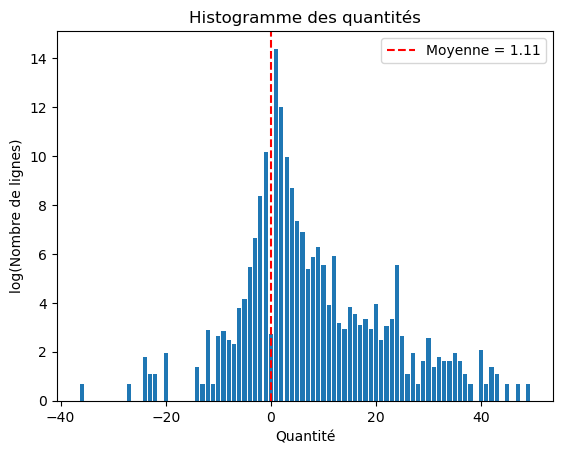

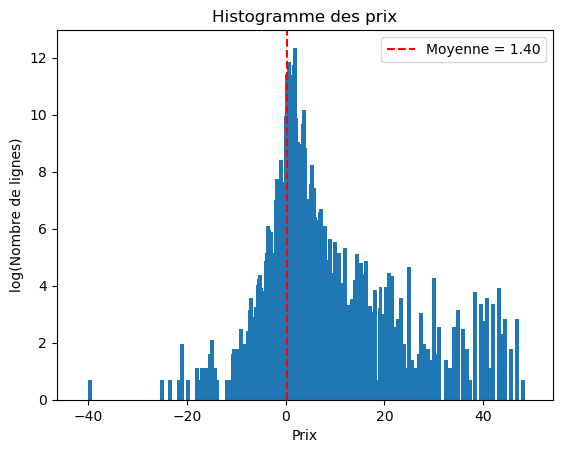

Prix négatif.................. 31463
Quantité négative............. 31173
Prix >50€..................... 16
Quantité >100................. 69


In [121]:
# graphiques des prix et quantités
## 1. valeurs extremes non prises en compte sinon graphique illisible
## 2. prise du log en ordonnée pour mieux voir les valeurs, sinon graphique illisible car écart trop grand

qtt = df[(df["Quantité"] < 50) & (df["Quantité"] > -50)]["Quantité"].value_counts()
ttc = df[(df["Total TTC"] < 50) & (df["Total TTC"] > -50)]["Total TTC"].value_counts()

log_qtt = np.log(qtt)
log_ttc = np.log(ttc)

moyenne_qtt = df["Quantité"].mean()
moyenne_ttc = df["Total TTC"].mean()

# barplot des quantités
plt.bar(log_qtt.index, log_qtt.values)
plt.axvline(x=np.log(moyenne_qtt), color='r', linestyle='--', label=f'Moyenne = {moyenne_qtt:.2f}')
plt.xlabel("Quantité")
plt.ylabel("log(Nombre de lignes)")
plt.title("Histogramme des quantités")
plt.legend()
plt.show()

# barplot des prix
plt.bar(log_ttc.index, log_ttc.values)
plt.axvline(x=np.log(moyenne_ttc), color='r', linestyle='--', label=f'Moyenne = {moyenne_ttc:.2f}')
plt.xlabel("Prix")
plt.ylabel("log(Nombre de lignes)")
plt.title("Histogramme des prix")
plt.legend()
plt.show()


print(f"{'Prix négatif':.<30} {df[df['Total TTC'] < 0].shape[0]}")
print(f"{'Quantité négative':.<30} {df[df['Quantité'] < 0].shape[0]}")
print(f"{'Prix >50€':.<30} {df[df['Total TTC'] > 50].shape[0]}")
print(f"{'Quantité >100':.<30} {df[df['Quantité'] > 100].shape[0]}")

On remarque que les quantités sont souvent négatives, ce qui représente sûrement des retours de produits.
On va regarder la quantité correspondant à chaque prix négatif.

In [ ]:
# On regarde la colonne quantité pour les lignes avec des prix négatifs
print(df[df["Total TTC"] < 0]["Quantité"].value_counts())

# Max et min des quantités
print(f'Quantité max : {df[df["Total TTC"] < 0]["Quantité"].max()}')
print(f'Quantité min : {df[df["Total TTC"] < 0]["Quantité"].min()}')

-1.0      25649
-2.0       4259
-3.0        768
-4.0        236
 1.0        231
-5.0         63
-6.0         45
 2.0         37
-12.0        18
-9.0         17
 5.0         16
-10.0        14
-8.0         12
 4.0         11
-7.0         10
 3.0          8
-20.0         7
-24.0         6
-14.0         4
-50.0         4
-100.0        4
-22.0         3
-23.0         3
-27.0         2
-11.0         2
-13.0         2
-36.0         2
 10.0         2
 9.0          2
-32.0         1
-116.0        1
-972.0        1
-135.0        1
-17.0         1
-29.0         1
-33.0         1
-30.0         1
-26.0         1
-250.0        1
-18.0         1
-35.0         1
-25.0         1
-64.0         1
-128.0        1
-256.0        1
-21.0         1
-200.0        1
-69.0         1
 11.0         1
 12.0         1
 16.0         1
 25.0         1
 6.0          1
 17.0         1
-19.0         1
Name: Quantité, dtype: int64
Quantité max : 25.0
Quantité min : -972.0


<AxesSubplot:ylabel='Quantité'>

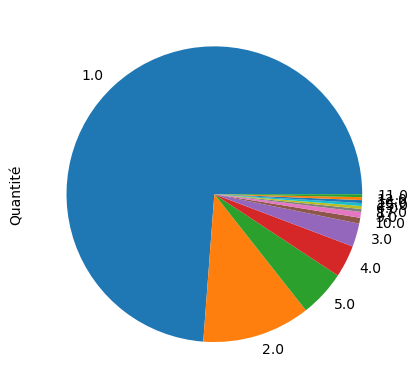

In [ ]:
# On affiche les lignes ayant un prix négatif et une quantité positive
df_temp = df[(df["Total TTC"] < 0) & (df["Quantité"] > 0)]
df_temp["Quantité"].value_counts()

# Cammenbert des quantités
df_temp["Quantité"].value_counts().plot.pie()

<AxesSubplot:ylabel='Article'>

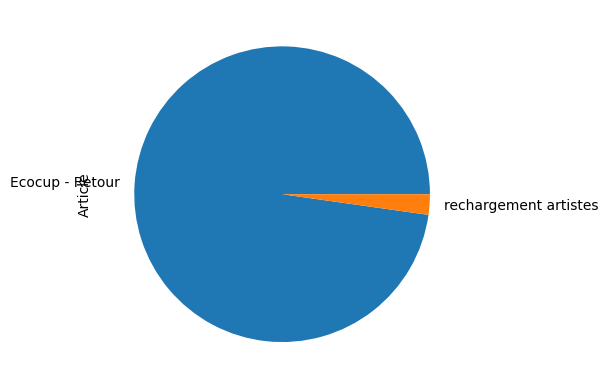

In [ ]:
# Cammenbert des articles
df_temp["Article"].value_counts().plot.pie()

<AxesSubplot:ylabel='Quantité'>

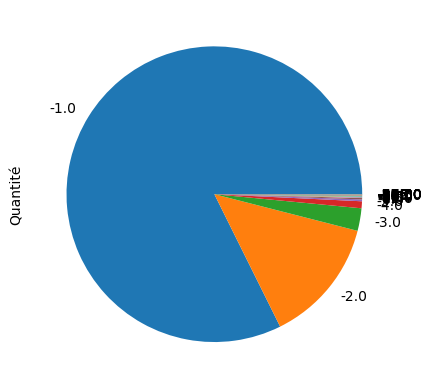

In [ ]:
# On effectue la même chose pour les quantités négatives
df_temp = df[(df["Total TTC"] < 0) & (df["Quantité"] < 0)]
df_temp["Quantité"].value_counts().plot.pie()

<AxesSubplot:ylabel='Article'>

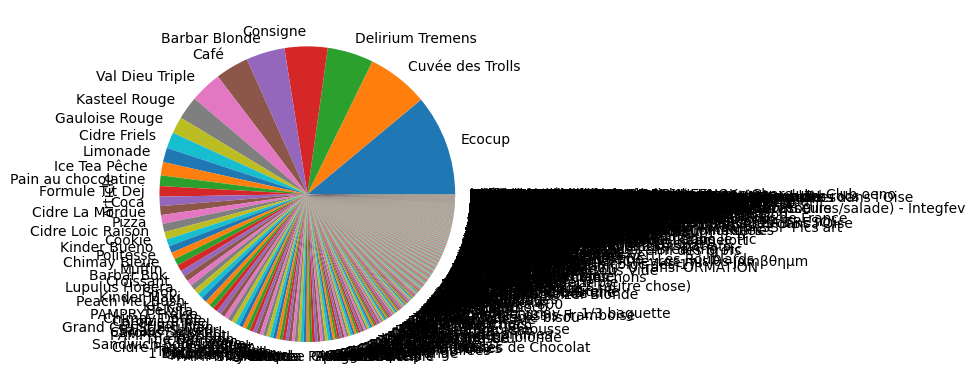

In [ ]:
# Cammenbert des articles
df_temp["Article"].value_counts().plot.pie()

#### Evolution du prix moyen des bières au cours du temps : (par mois)

In [ ]:
df['Date/heure transaction'] = df['Date/heure transaction'].str.replace('\.\d+', '', regex=True)
df['Date/heure transaction'] = pd.to_datetime(df['Date/heure transaction'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# On tri le tableau par date
df = df.sort_values(by=['Date/heure transaction'])